nm3302

# MNIST Sign Language

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input

In [4]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        # TODO: Create a Sequential model
        model = Sequential()
        model.add(Input(shape=(28,28,1)))
        model.add(Conv2D(32,(5,5),strides=1, activation='relu'))
        model.add(MaxPooling2D((2,2), strides=2))
        model.add(Conv2D(64,(5,5),strides=1, activation= 'relu'))
        model.add(MaxPooling2D((2,2),strides=2))
        model.add(Conv2D(128,(3,3),strides=1, activation= 'relu'))
        model.add(MaxPooling2D((2,2),strides=2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.65))
        model.add(Dense(25, activation='softmax'))

        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

        self.model = model

    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)

        images = images.reshape(-1,28,28,1)/255.0
        labels = to_categorical(labels, num_classes=25)
        train_data, test_data, train_label, test_label = train_test_split(images,labels, test_size=0.25)

        self.data = {
            "train": (train_data, train_label), # (x_train, y_train)
            "test" : (test_data, test_label), # (x_test, y_test)
        }

    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        history = self.model.fit(x=self.data['train'][0], y=self.data['train'][1], batch_size=batch_size, epochs=epochs, verbose=verbose,validation_data=self.data['test'])

        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        data =data.reshape(-1,28,28,1)/255.0

        return np.argmax(self.model.predict(data),axis=1)

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [5]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [6]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

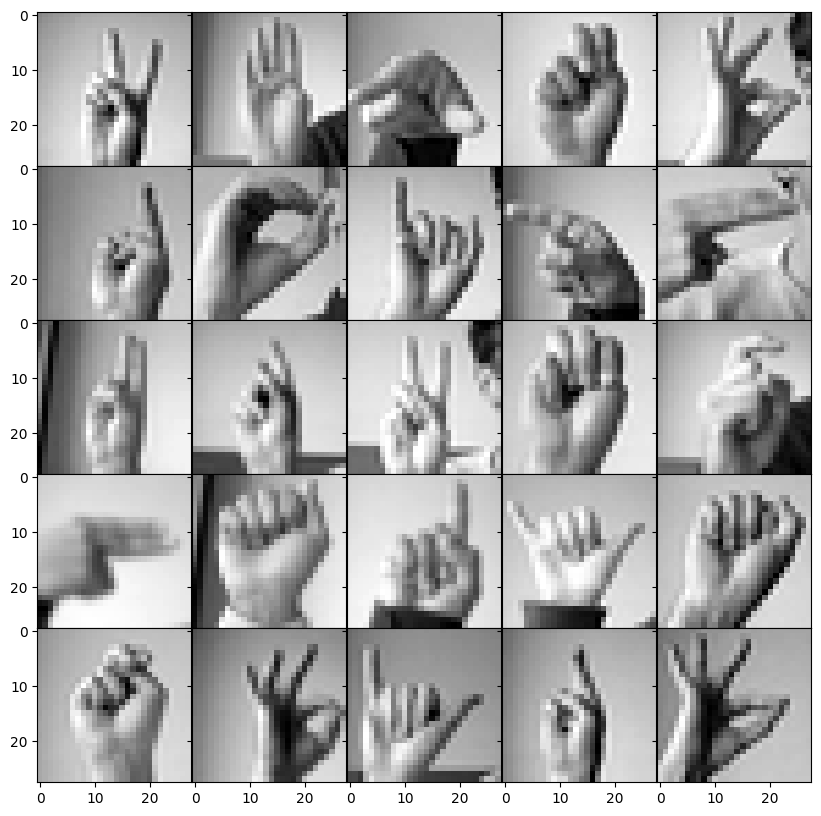

In [7]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 157ms/step - accuracy: 0.0740 - loss: 3.0920 - val_accuracy: 0.4382 - val_loss: 1.8152
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.4234 - loss: 1.7261 - val_accuracy: 0.8008 - val_loss: 0.7093
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.6790 - loss: 0.9279 - val_accuracy: 0.9197 - val_loss: 0.3484
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.7976 - loss: 0.5821 - val_accuracy: 0.9486 - val_loss: 0.1774
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 168ms/step - accuracy: 0.8646 - loss: 0.3895 - val_accuracy: 0.9809 - val_loss: 0.0963
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - accuracy: 0.9130 - loss: 0.2596 - val_accuracy: 0.9940 - val_loss: 0.0512
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.9338 - loss: 0.1947 - val_accuracy: 0.9977 - val_loss: 0.0270
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 34s 213ms/step - accuracy: 0.9489 - loss: 0

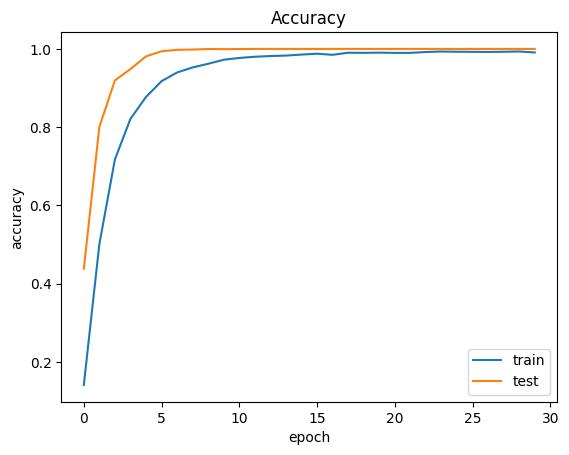

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
0.9564974902398216


# Classical ML Classifier Evaluation

In addition to the Sequential neural network, I evaluated four classical machine learning models (Logistic Regression, K-Nearest Neighbors, Random Forest, and AdaBoost) on the same dataset. The data was flattened for compatibility with these models.

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [19]:
X_flat = train_images.reshape(train_images.shape[0],-1)
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X_flat, train_labels, test_size=0.25)

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Store results
results = []



🔍 Logistic Regression
Accuracy: 0.9996
Confusion Matrix:


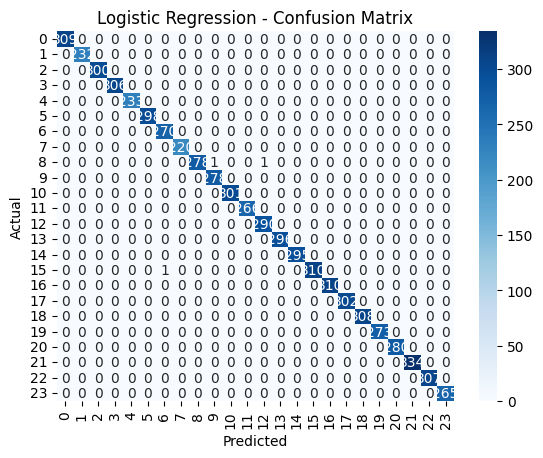

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       232
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       306
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       298
           6       1.00      1.00      1.00       270
           7       1.00      1.00      1.00       220
           8       1.00      0.99      1.00       280
          10       1.00      1.00      1.00       278
          11       1.00      1.00      1.00       301
          12       1.00      1.00      1.00       266
          13       1.00      1.00      1.00       290
          14       1.00      1.00      1.00       296
          15       1.00      1.00      1.00       295
          16       1.00      1.00      1.00       311
          17       1.00      1.00      1.00       310
    

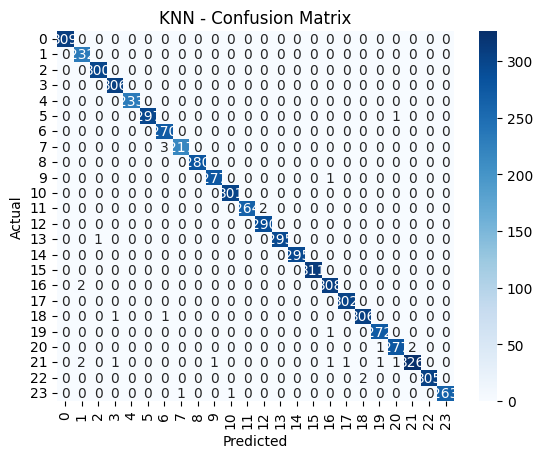

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       0.98      1.00      0.99       232
           2       1.00      1.00      1.00       300
           3       0.99      1.00      1.00       306
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       298
           6       0.99      1.00      0.99       270
           7       1.00      0.99      0.99       220
           8       1.00      1.00      1.00       280
          10       1.00      1.00      1.00       278
          11       1.00      1.00      1.00       301
          12       1.00      0.99      1.00       266
          13       0.99      1.00      1.00       290
          14       1.00      1.00      1.00       296
          15       1.00      1.00      1.00       295
          16       1.00      1.00      1.00       311
          17       0.99      0.99      0.99       310
    

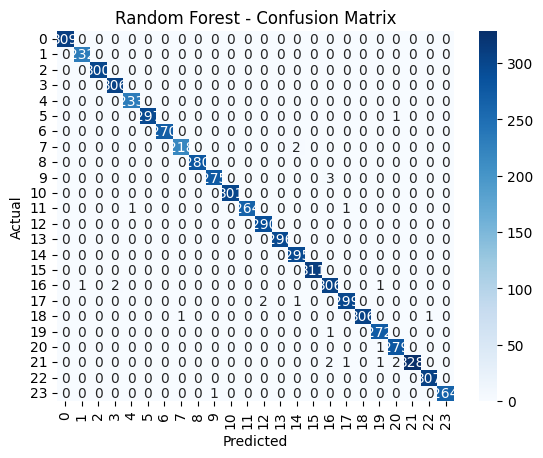

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       232
           2       1.00      1.00      1.00       300
           3       0.99      1.00      1.00       306
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       298
           6       1.00      1.00      1.00       270
           7       1.00      0.99      0.99       220
           8       1.00      1.00      1.00       280
          10       1.00      0.99      0.99       278
          11       1.00      1.00      1.00       301
          12       1.00      0.99      1.00       266
          13       0.99      1.00      1.00       290
          14       1.00      1.00      1.00       296
          15       0.99      1.00      0.99       295
          16       1.00      1.00      1.00       311
          17       0.98      0.99      0.98       310
    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔍 AdaBoost
Accuracy: 0.3475
Confusion Matrix:


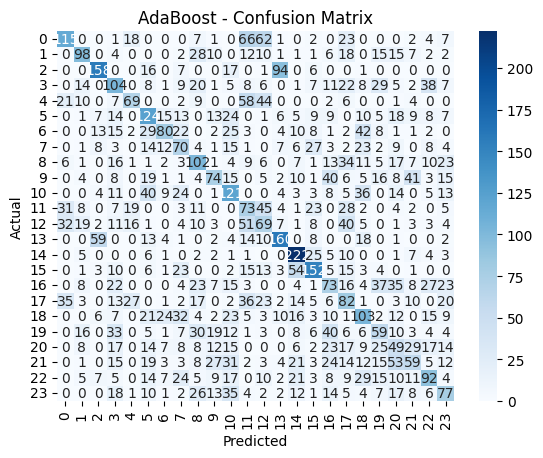

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.37      0.42       309
           1       0.48      0.42      0.45       232
           2       0.59      0.53      0.56       300
           3       0.30      0.34      0.32       306
           4       0.45      0.30      0.36       233
           5       0.34      0.42      0.38       298
           6       0.47      0.30      0.36       270
           7       0.26      0.32      0.29       220
           8       0.32      0.36      0.34       280
          10       0.37      0.27      0.31       278
          11       0.32      0.40      0.35       301
          12       0.20      0.27      0.23       266
          13       0.22      0.24      0.23       290
          14       0.51      0.54      0.53       296
          15       0.52      0.75      0.62       295
          16       0.50      0.49      0.49       311
          17       0.24      0.24      0.24       310
    

In [20]:
# Train and evaluate each model
for name, clf in classifiers.items():
    clf.fit(X_train_flat, y_train)
    y_pred = clf.predict(X_test_flat)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    
    print(f"\n🔍 {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

/var/folders/p5/q0c8j_5159z83dwgrqvmtrm40000gn/T/ipykernel_31391/3256980047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Classifier", y="Accuracy", palette="muted")


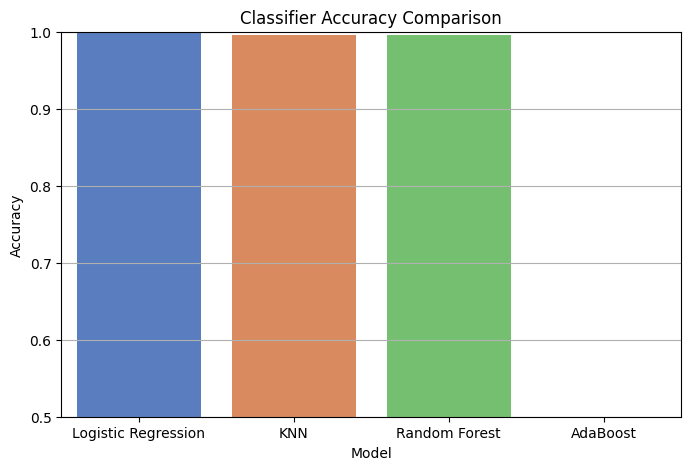

In [21]:
df_results = pd.DataFrame(results, columns=["Classifier", "Accuracy"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_results, x="Classifier", y="Accuracy", palette="muted")
plt.ylim(0.5, 1.0)
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y')
plt.show()